In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demo-knes381/subject_1321.xlsx
/kaggle/input/demo-knes381/subject_1432.xlsx
/kaggle/input/demo-knes381/subject_1321.csv
/kaggle/input/demo-knes381/subject_1232.csv
/kaggle/input/demo-knes381/VO2_CSV.csv
/kaggle/input/demo-knes381/subject_1232.xlsx
/kaggle/input/demo-knes381/subject_1432.csv
/kaggle/input/demo-knes381/subject_1523.csv
/kaggle/input/demo-knes381/VO2_excel.xlsx
/kaggle/input/demo-knes381/subject_1523.xlsx


In [2]:
df = pd.read_csv('../input/demo-knes381/subject_1523.csv', header=[0], skiprows=[1,2,3])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIME         54 non-null     float64
 1    "VO2   "    54 non-null     float64
 2    "VO2/kg  "  54 non-null     float64
 3    "METS "     54 non-null     float64
 4    "VCO2  "    54 non-null     float64
 5    "VE     "   54 non-null     float64
 6    "RER  "     54 non-null     float64
 7    "RR  "      54 non-null     float64
 8    "Vt    "    54 non-null     float64
 9    "FEO2  "    54 non-null     float64
 10   "FECO2 "    54 non-null     float64
 11   "HR  "      54 non-null     float64
 12   "VE/   "    54 non-null     float64
 13   "VE/   ".1  54 non-null     float64
 14   "PetCO2 "   54 non-null     float64
 15  PO           54 non-null     int64  
dtypes: float64(15), int64(1)
memory usage: 6.9 KB


### Rename some of the columns so they make sense
you can rename them with the value TIME -> Time(min) but don't leave spaces if you want to auto-complete names...

In [4]:
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIME         54 non-null     float64
 1    "VO2   "    54 non-null     float64
 2    "VO2/kg  "  54 non-null     float64
 3    "METS "     54 non-null     float64
 4    "VCO2  "    54 non-null     float64
 5    "VE     "   54 non-null     float64
 6    "RER  "     54 non-null     float64
 7    "RR  "      54 non-null     float64
 8    "Vt    "    54 non-null     float64
 9    "FEO2  "    54 non-null     float64
 10   "FECO2 "    54 non-null     float64
 11   "HR  "      54 non-null     float64
 12   "VE/   "    54 non-null     float64
 13   "VE/   ".1  54 non-null     float64
 14   "PetCO2 "   54 non-null     float64
 15  PO           54 non-null     int64  
dtypes: float64(15), int64(1)
memory usage: 6.9 KB


In [6]:
import matplotlib.pyplot as plt

### Create our big plot...
1st define our variables x,y,& y1

In [7]:
print(df.columns)

Index(['TIME ', ' "VO2   "', ' "VO2/kg  "', ' "METS "', ' "VCO2  "',
       ' "VE     "', ' "RER  "', ' "RR  "', ' "Vt    "', ' "FEO2  "',
       ' "FECO2 "', ' "HR  "', ' "VE/   "', ' "VE/   ".1', ' "PetCO2 "',
       'PO '],
      dtype='object')


In [8]:
df.reset_index(drop=True)

,TIME,"""VO2 ""","""VO2/kg ""","""METS ""","""VCO2 ""","""VE ""","""RER ""","""RR ""","""Vt ""","""FEO2 ""","""FECO2 ""","""HR ""","""VE/ ""","""VE/ "".1","""PetCO2 """,PO
0,0.514000,1.459290,16.582838,4.737954,1.112682,41.919689,0.762482,21.400778,1.958793,16.275774,3.774875,87.0,28.726089,37.674450,25.064108,50
1,1.022167,1.504223,17.093439,4.883840,1.160519,42.434860,0.771507,21.646441,1.960362,16.181290,3.888129,89.0,28.210491,36.565426,26.064850,50
2,1.519834,1.555103,17.671625,5.049036,1.147277,41.991577,0.737750,22.103148,1.899801,16.005651,3.884471,84.0,27.002441,36.601089,25.945581,50
3,2.012334,1.745615,19.836536,5.667582,1.338574,46.513016,0.766821,16.243654,2.863458,15.907585,4.089391,92.0,26.645630,34.748173,27.309790,50
4,2.532000,1.667379,18.947485,5.413567,1.274816,43.739609,0.764563,23.091724,1.894168,15.831031,4.141047,91.5,26.232559,34.310535,27.466810,50
5,3.035667,1.632267,18.548485,5.299567,1.244890,45.649750,0.762676,21.839842,2.090205,16.149261,3.877208,86.0,27.967091,36.669708,25.841257,125
6,3.502500,1.818190,20.661253,5.903215,1.374394,49.003513,0.755913,21.420919,2.287647,15.976556,3.986471,94.0,26.951805,35.654636,26.431112,125
7,4.033833,2.134393,24.254469,6.929848,1.626248,57.404961,0.761925,26.348808,2.178655,15.959549,4.026214,99.0,26.895214,35.299011,26.932281,125
8,4.529832,2.295791,26.088533,7.453866,1.817946,60.387909,0.791860,22.177420,2.722946,15.814274,4.275898,105.0,26.303749,33.217655,28.339865,125
9,5.019832,2.377771,27.020124,7.720036,1.955959,63.075264,0.822602,20.408165,3.090688,15.823215,4.403218,109.0,26.527058,32.247746,29.279306,125


In [12]:
df.columns = df.columns.str.strip().str.replace('"', '')

In [13]:
# simplify our terms to reduce future typing...
x = df['TIME']
y = df['VO2']
y1 = df['VE']

#### Find the position where max occurs

In [14]:
#Find VO2 max value 
ymax = max(y)
# find the x position of the ymax value
xmax = x[y.argmax()]

In [15]:
print(ymax)
print(xmax)

4.184775
26.500189


#### Create the frame and the axis that we will plot in

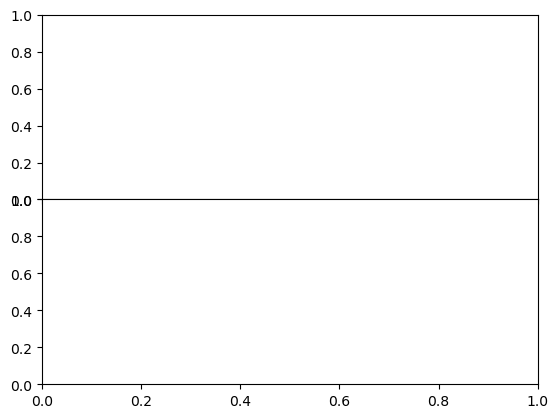

In [16]:
# break up the figure and axis definitions of a plot 
# so it is easier to assign values
fig, ax = plt.subplots(2, 1, sharex=True)
# create 2 subplots share x axis, in the next line we will remove 
# spaces between the horizontal axis, play with this value?
fig.subplots_adjust(hspace=0)

Annotate the position and marker for VO2 max

In [17]:
ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ 1),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

Text(27.000189, 5.184775, '$\\dot VO_2max$ =(4.18) L/min')

#### For the first plot ax[0] we create the lable and make it red
Then we get rid of the right and top plot frame
We set the y axis lab as "L/min" and tell it to print a legend

In [18]:
ax[0].plot(x, y,  label=('$\dot VO_2$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)
#note all these set features could be added in one line but reading it would be difficult
#ax.set(title = ('$\dot VO_2$'), label=('$\dot VO_2$ L/min'))  
ax[0].set(ylabel=('L/min'))
ax[0].legend()

Same thing for the second plot

In [19]:
# Second plot of values down from the top
ax[1].plot(x, y1, label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].legend()

#### We can now create a file with our first plot!

In [20]:
fig.savefig("VO2-3.png", dpi=300, bbox_inches = "tight")

#### As this is an interactive space we need to put all the code together for it to plot out interactively...

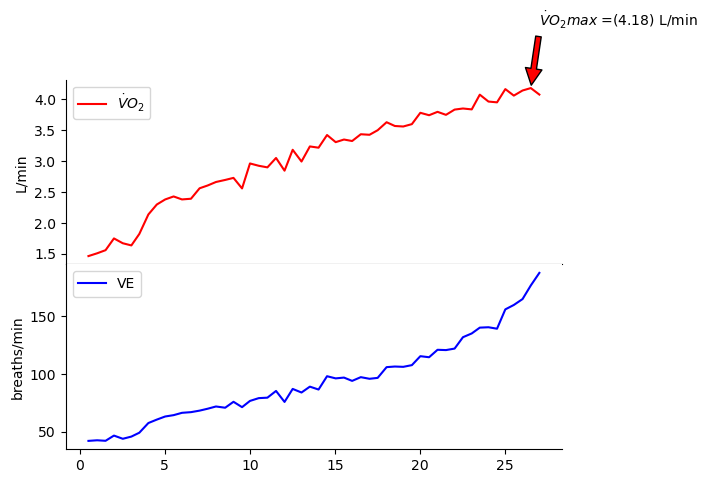

In [21]:
# break up the figure and axis definitions of a plot 
# so it is easier to assign values
fig, ax = plt.subplots(2, 1, sharex=True)
# create 2 subplots share x axis, in the next line we will remove 
# spaces between the horizontal axis, play with this value?
fig.subplots_adjust(hspace=0)
ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ 1),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

ax[0].plot(x, y,  label=('$\dot VO_2$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)
#note all these set features could be added in one line but reading it would be difficult
#ax.set(title = ('$\dot VO_2$'), label=('$\dot VO_2$ L/min'))  
ax[0].set(ylabel=('L/min'))
ax[0].legend()

# Second plot of values down from the top
ax[1].plot(x, y1, label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].legend()
fig.show()